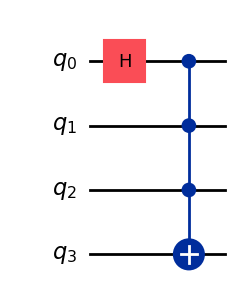

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0,1,2,3])
qc.draw('mpl')

In [19]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
import qiskit_aer as Aer

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [9]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\lllee\AppData\Local\Temp\ipykernel_2060\1242803793.py:7: SyntaxWarning: invalid escape sequence '\o'
  oracle_ex3.name = "U$_\omega$"


In [11]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [17]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├──────
        ├───┤│             ││        │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 U$_\omega$ ├┤1 U$_s$ ├─░──╫─┤M├───
        ├───┤│             ││        │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2

In [ ]:
statevector_sim = Aer.StatevectorSimulator()
transpiled_grover_circuit = transpile(qc, statevector_sim)

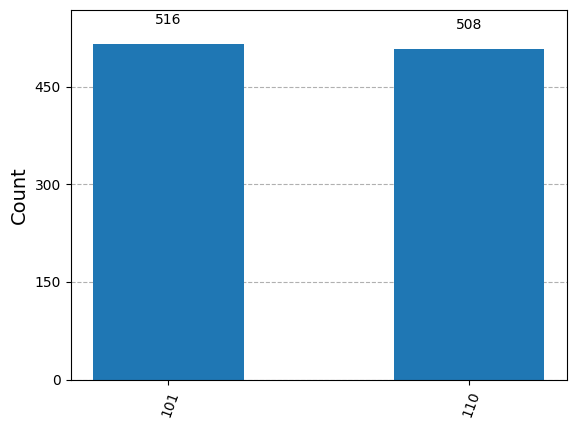

In [24]:
statevector_sim = Aer.QasmSimulator()
transpiled_grover_circuit = transpile(grover_circuit, statevector_sim)
results = statevector_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 2 and 3
print(np.kron(P0, I))
print(np.kron(P1, X))
CX_23 = np.kron(P0, I) + np.kron(P1, X)

# To apply CX to qubits 2 and 3 in a 3-qubit system, kron with I for qubit 1
total_gate = np.kron(I, CX_23)

print("3-qubit system CX gate applied to qubits 2 and 3:")
print(total_gate)



[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]
3-qubit system CX gate applied to qubits 2 and 3:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [8]:
import numpy as np
state = np.array([0, 0, 0, 0, 1, 0, 0, 0])
# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 1 and 3
CX_13 = np.kron(P0, np.kron(I, I)) + np.kron(P1, np.kron(I, X))

print("3-qubit system CX gate applied to qubits 1 and 3:")
print(CX_13)

print("State after applying CX gate to qubits 1 and 3:")
print(np.dot(CX_13, state))

3-qubit system CX gate applied to qubits 1 and 3:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]
State after applying CX gate to qubits 1 and 3:
[0 0 0 0 0 1 0 0]


In [10]:
import numpy as np
state = np.array([0, 1, 0, 0, 0, 0, 0, 0])
# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 1 and 3
CX_13 = np.kron(np.kron(I, I), P0) + np.kron(np.kron(I, X), P1)

print("3-qubit system CX gate applied to qubits 1 and 3:")
print(CX_13)

print("State after applying CX gate to qubits 1 and 3:")
print(np.dot(CX_13, state))

3-qubit system CX gate applied to qubits 1 and 3:
[[1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]]
State after applying CX gate to qubits 1 and 3:
[0 0 0 1 0 0 0 0]


In [11]:
### 4 qubit system apply cx gate to qubits 1 and 3
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 1 and 3 in a 4-qubit system
# 첫 크론 컨트롤, 타겟 - 2, 2
# 두번째 크론 1. (컨트롤, I_1), 2. (I, I_2) 3. (타겟, I_3) 4. (x, I_4)  --- 4, 4
# 마지막 클론 합 - 16 + 16
CX_13 = np.kron(np.kron(P0, I), np.kron(I, I)) + np.kron(np.kron(P1, I), np.kron(X, I))

print("4-qubit system CX gate applied to qubits 1 and 3:")
print(CX_13)


4-qubit system CX gate applied to qubits 1 and 3:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [ ]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 1 and 3 in a 5-qubit system
# 첫 크론 컨트롤, 타겟 - 2, 2
# 두번째 크론 1. (컨트롤_1, I_2), 2. (I, I_2), I_3 3. (타겟, I_3) 4. (x, I_5)  --- 4, 4
# 마지막 클론 합 - 16 + 16
CX_13 = np.kron(np.kron(P0, I), np.kron(np.kron(I, I), I)) + np.kron(np.kron(P1, I), np.kron(np.kron(X, I), I))

print("5-qubit system CX gate applied to qubits 1 and 3:")
print(CX_13)


In [ ]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CX gate for qubits 2 and 5 in a 6-qubit system
CX_25 = np.kron(np.kron(I, P0), np.kron(np.kron(I, I), np.kron(I, I))) + np.kron(np.kron(I, P1), np.kron(np.kron(I, I), np.kron(X, I)))

print("6-qubit system CX gate applied to qubits 2 and 5:")
print(CX_25)


In [36]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

control = np.array([[1, 0], [0, 0]])
target = np.array([[0, 0], [0, 1]])

control_gate = 1
target_gate = 1

print("Control gate:", control_gate, "\n")
control_gate = np.kron(control_gate, control)
print(control_gate, "\n")
control_gate = np.kron(control_gate, I)
print(control_gate, "\n")
control_gate = np.kron(control_gate, I)
print(control_gate, "\n")
control_gate = np.kron(control_gate, I)
print(control_gate, "\n")
print("\n")
print("all in once: ")
print(np.kron(np.kron(control, I), np.kron(I, I)))

CX_13 = np.kron(np.kron(P0, I), np.kron(I, I)) + np.kron(np.kron(P1, I), np.kron(X, I))

Control gate: 1 

[[1 0]
 [0 0]] 

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]] 

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 



all in once: 
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

In [38]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CCX gate for qubits 2, 3 (controls) and 5 (target) in a 6-qubit system
CCX_235 = (
    np.kron(np.kron(I, np.kron(P0, P0)), np.kron(I, np.kron(I, I))) +
    np.kron(np.kron(I, np.kron(P0, P1)), np.kron(I, np.kron(I, I))) +
    np.kron(np.kron(I, np.kron(P1, P0)), np.kron(I, np.kron(I, I))) +
    np.kron(np.kron(I, np.kron(P1, P1)), np.kron(I, np.kron(X, I)))
)

print("6-qubit system CCX gate applied to qubits 2, 3 (controls) and 5 (target):")
print(CCX_235)


6-qubit system CCX gate applied to qubits 2, 3 (controls) and 5 (target):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

In [40]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CCX gate for qubits 0, 2 (controls) and 3 (target) in a 4-qubit system
CCX_023 = (
    np.kron(np.kron(P0, I), np.kron(P0, I)) +
    np.kron(np.kron(P0, I), np.kron(P1, I)) +
    np.kron(np.kron(P1, I), np.kron(P0, I)) +
    np.kron(np.kron(P1, I), np.kron(P1, X))
)

print("4-qubit system CCX gate applied to qubits 0, 2 (controls) and 3 (target):")
print(CCX_023)

state = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print("State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):")
print(np.dot(CX_13, state))


4-qubit system CCX gate applied to qubits 0, 2 (controls) and 3 (target):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
import numpy as np

# Define X and I gates
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

# Define projectors |0><0| and |1><1|
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# CCX gate for qubits 0, 2 (controls) and 1 (target) in a 3-qubit system
# The total size will be 2^3 x 2^3 = 8 x 8
CCX_021 = (
    np.kron(P0, np.kron(I, P0)) +  # Both controls are |0⟩
    np.kron(P0, np.kron(I, P1)) +  # Control 0 is |0⟩, control 2 is |1⟩
    np.kron(P1, np.kron(I, P0)) +  # Control 0 is |1⟩, control 2 is |0⟩
    np.kron(P1, np.kron(X, P1))    # Both controls are |1⟩
)

# CX gate for qubits 1 and 3 in a 5-qubit system
# 첫 크론 컨트롤, 타겟 - 2, 2
# 두번째 크론 1. (컨트롤_1, I_2), 2. (I, I_2), I_3 3. (타겟, I_3) 4. (x, I_5)  --- 4, 4
# 마지막 클론 합 - 16 + 16
CX_13 = (
    np.kron(np.kron(P0, I), np.kron(np.kron(I, I), I)) + 
    np.kron(np.kron(P1, I), np.kron(np.kron(X, I), I))
)
print("3-qubit system CCX gate applied to qubits 0, 2 (controls) and 1 (target):")
print(CCX_021)
print("Shape of CCX_021:", CCX_021.shape)

state = np.array([0, 0, 0, 0, 0, 0, 0, 1])
print("State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):")
print(np.dot(CCX_021, state))


print(np.kron(P0, np.kron(I, P0)))
print(np.kron(np.kron(P0, I), P0))


3-qubit system CCX gate applied to qubits 0, 2 (controls) and 1 (target):
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]]
Shape of CCX_021: (8, 8)
State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):
[0 0 0 0 0 1 0 0]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [66]:
import numpy as np

def combine_terms(num_qubits, control_qubits, target_qubit, gate):
    """
    Constructs a matrix for a controlled gate with the given control and target qubits.
    
    Parameters:
    - num_qubits: Total number of qubits in the system
    - control_qubits: List of indices of control qubits (0-based)
    - target_qubit: Index of the target qubit (0-based)
    - gate: The gate to apply to the target qubit when all controls are |1⟩
    
    Returns:
    - A matrix representing the controlled gate
    """
    I = np.array([[1, 0], [0, 1]])  # Identity matrix
    P0 = np.array([[1, 0], [0, 0]])  # Projector for |0⟩
    P1 = np.array([[0, 0], [0, 1]])  # Projector for |1⟩
    cases = [P0, P1]
    # Initialize the matrix as a zero matrix
    total_size = 2 ** num_qubits
    matrix = np.zeros((total_size, total_size), dtype=complex)
    
    # Loop over all possible combinations of control qubits
    for i in range(2 ** len(control_qubits)):
        # Determine the control states for this combination
        control_state = [int(x) for x in format(i, f'0{len(control_qubits)}b')]
        print(control_state)
        # Create the Kronecker product for this control state
        term = np.eye(1)
        order = 0
        for j in range(num_qubits):
            if j in control_qubits:
                term = np.kron(term, cases[control_state[order]])
                order += 1
            elif j == target_qubit:
                term = np.kron(term, gate)
            else:
                term = np.kron(term, I)
        # Add the term to the matrix
    
        matrix += term
    
    return matrix

# Define X and I gates
X = np.array([[0, 1], [1, 0]])

# Example: CCX (Toffoli) gate for a 3-qubit system, controls: 0, 2, target: 1
num_qubits = 3
control_qubits = [0, 2]
target_qubit = 1

CCX_021 = combine_terms(num_qubits, control_qubits, target_qubit, X)

print("3-qubit system CCX gate applied to qubits 0, 2 (controls) and 1 (target):")
print(CCX_021)
print("Shape of CCX_021:", CCX_021.shape)

state = np.array([1, 0, 0, 0, 0, 0, 0, 0])
print("State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):")
print(np.dot(CCX_021, state))


[0, 0]
[0, 1]
[1, 0]
[1, 1]
3-qubit system CCX gate applied to qubits 0, 2 (controls) and 1 (target):
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
Shape of CCX_021: (8, 8)
State after applying CCX gate to qubits 0, 2 (controls) and 3 (target):
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
